In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
#figsiz_=(11,2.5*2)
figsiz_=(15,2.5*2)
fontsiz = 18


plt.rc('figure', figsize=figsiz_,dpi=100)
plt.rcParams['figure.figsize'] = figsiz_
plt.rc('font', family='serif', size=fontsiz)

In [3]:
import numpy as np
import math
# f1 = lambda x: 5.5*torch.sin(x*2*math.pi*5.1)
# f2 = lambda x: 5.0*torch.sin(x*2*math.pi*2.1)
# f3 = lambda x: 5.5*torch.sin(x*2*math.pi*4.1)

f1 = lambda x: 2.0*torch.sin(x*2*math.pi*5.1)
f2 = lambda x: 3.0*torch.sin(x*2*math.pi*2.1)
#f2 = lambda x: 3.0*torch.sin(x*2*math.pi*2.1) - 2.0*torch.sin(x*2*math.pi*8.1)**2

f3 = lambda x: 4.0*torch.sin(x*2*math.pi*4.1)

f= [f1,f2,f3]


nfull,nsub,nsub2=200,20,40
#nfull,nsub,nsub2=200,15,30

#nfull,nsub=100,50
#nchannels = 2
nchannels = 3

x_lb,x_ub=0,4

# idx=np.sort(np.random.randint(nfull, size=(nchannels, nsub)),axis=1)
# idx2=np.sort(np.random.randint(nfull, size=(nchannels, nsub2)),axis=1)

ratio=0.55
#ratio=0.7
#ratio=0.8

#idx=np.sort(np.random.randint(int(nfull*0.66), size=(nchannels, nsub)),axis=1)
idx11=np.sort(np.random.randint(int(nfull*ratio), size=(1, nsub)),axis=1)
idx12=np.sort(np.random.randint(int(nfull*ratio), size=(1, nsub)),axis=1) + int(nfull*(1-ratio))
idx13=np.sort(np.random.randint(int(nfull), size=(1, nsub)),axis=1) 

if nchannels == 2:
    idx=np.concatenate([idx11,idx12],axis=0)
elif nchannels == 3:
    idx=np.concatenate([idx11,idx12,idx13],axis=0)
else:
    pass
idx2=np.sort(np.random.randint(nfull, size=(nchannels, nsub2)),axis=1)


x_c = torch.cat([(torch.linspace(x_lb,x_ub,nfull)[idx[j]])[None,:] for j in range(nchannels)],dim=0)
x_t = torch.cat([(torch.linspace(x_lb,x_ub,nfull)[idx2[j]])[None,:] for j in range(nchannels)],dim=0)
y_c = torch.cat([f[j](x_c[j])[None,:] for j in range(nchannels)],dim=0)
y_t = torch.cat([f[j](x_t[j])[None,:] for j in range(nchannels)],dim=0)


x_f = torch.cat([torch.linspace(x_lb,x_ub,nfull)[None,:] for j in range(nchannels)],dim=0)
y_f = torch.cat([f[j](x_f[j])[None,:] for j in range(nchannels)],dim=0)


x_c=x_c.T.unsqueeze(dim=0)
y_c=y_c.T.unsqueeze(dim=0)
x_t=x_t.T.unsqueeze(dim=0)
y_t=y_t.T.unsqueeze(dim=0)
x_f=x_f.T.unsqueeze(dim=0)
y_f=y_f.T.unsqueeze(dim=0)

nb=3
xc=x_c.repeat(nb,1,1).unsqueeze(dim=-2)
yc=y_c.repeat(nb,1,1)
xt=x_t.repeat(nb,1,1).unsqueeze(dim=-2)
yt=y_t.repeat(nb,1,1)

xf=x_f.repeat(nb,1,1).unsqueeze(dim=-2)
yf=y_f.repeat(nb,1,1)


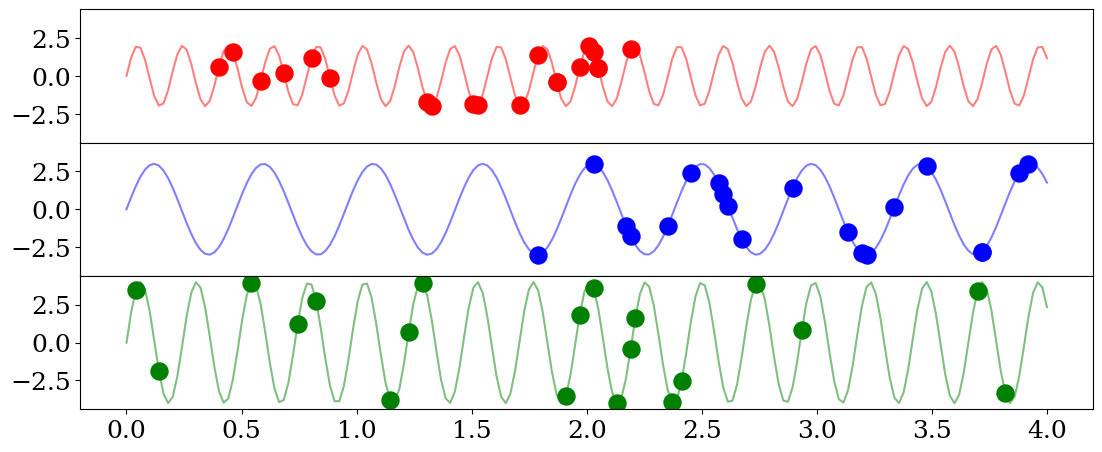

In [4]:
# import matplotlib.pyplot as plt
# figsiz_=(20,2.5*3)
# #delta=
#ylim_ = [-5-delta,5+delta]

#xlim_ = [0-delta,10+delta]
delta_x = 0.1
delta_y = 0.1
y_=5
xlim_ = [x_lb-delta_x,x_ub+delta_x]
ylim_ = [-y_-delta_y,y_+delta_y]
color_list = ['r','b','g']
xtick_ = list(np.arange(x_ub+1.))
ytick_ = [-(y_-1),0,(y_-1)]









fig, (ax1, ax2 ,ax3) = plt.subplots(nrows=3, sharex=True, sharey=True)
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=0.00)
# ax1.plot(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color_list[0]+'o-',markersize=10,label='ch 1')
# ax2.plot(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color_list[1]+'o-',markersize=10,label='ch 2')

ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color=color_list[0],marker='o',s=150)
ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color=color_list[1],marker='o',s=150)
ax3.scatter(xc[0,:,0,2].cpu().data.numpy(),yc[0,:,2].cpu().data.numpy(),color=color_list[2],marker='o',s=150)

ax1.plot(xf[0,:,0,0].cpu().data.numpy(),yf[0,:,0].cpu().data.numpy(),color_list[0]+'-',markersize=10,label='ch 1',alpha=0.5)
ax2.plot(xf[0,:,0,1].cpu().data.numpy(),yf[0,:,1].cpu().data.numpy(),color_list[1]+'-',markersize=10,label='ch 2',alpha=0.5)
ax3.plot(xf[0,:,0,2].cpu().data.numpy(),yf[0,:,2].cpu().data.numpy(),color_list[2]+'-',markersize=10,label='ch 3',alpha=0.5)

plt.show()

In [5]:
xt.shape

torch.Size([3, 40, 1, 3])

In [6]:

# fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True)
# plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=0.00)
# # ax1.plot(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color_list[0]+'o-',markersize=10,label='ch 1')
# # ax2.plot(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color_list[1]+'o-',markersize=10,label='ch 2')

# ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color=color_list[0],marker='o',s=150)
# ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color=color_list[1],marker='o',s=150)
# ax1.plot(xf[0,:,0,0].cpu().data.numpy(),yf[0,:,0].cpu().data.numpy(),color_list[0]+'-',markersize=10,label='ch 1',alpha=0.5)
# ax2.plot(xf[0,:,0,1].cpu().data.numpy(),yf[0,:,1].cpu().data.numpy(),color_list[1]+'-',markersize=10,label='ch 2',alpha=0.5)
# plt.show()

In [7]:
#xf.shape,yf.shape,xc.shape,yc.shape

In [8]:
from test_baseline import Convcnp,compute_loss_baseline
from test_kernels import SM_kernel
#from test_gpsampler import Independent_GPsampler,Multioutput_GPsampler,Multioutput_GPsampler_Cat
# from test_gpsampler import Independent_GPsampler,Independent_GPsampler2
# from test_gpsampler import Multioutput_GPsampler,Multioutput_GPsampler2

#from test_gpsampler import Independent_GPsampler_Proxi,Multioutput_GPsampler_Proxi

In [9]:
#from test_gpsampler2 import Spikeslab_GPsampler
#from test_gpsampler3 import NeuralSpikeslab_GPsampler


from test_gpsampler4 import  Independent_GPsampler
#from test_gpsampler3 import Spikeslab_GPsampler
from test_gpsampler7 import Spikeslab_GPsampler
from test_gpsampler7_ablation import Spikeslab_GPsampler_ablation




In [10]:
# #num_channels = 3
# cnntype='deep'
# #cnntype='shallow'

# num_channels = nchannels
# in_dims,out_dims = 1,1
# multiplier = 2**6 if cnntype=='deep' else 2**3
# #num_fourierbasis = 20
# num_fourierbasis = 10

# #init_lscale=1.
# #init_lscale=1.
# #init_lscale=.5
# #init_lscale=.25
# #init_lscale=1.

# #init_lscale=1.
# #init_lscale=0.1
# #init_lscale = .25
# init_lscale=0.5

# #kernel = SM_kernel(in_dims=in_dims,num_channels=num_channels,scales=1.,loglik_err=0.1)
# kernel = SM_kernel(in_dims=in_dims,num_channels=num_channels,scales=init_lscale,loglik_err=0.1)
# # i_gpsampler = Independent_GPsampler(kernel, in_dims=in_dims,out_dims=out_dims,num_channels=num_channels, num_fourierbasis = num_fourierbasis,num_sampleposterior=5,multiplier = multiplier)
# # iproxi_gpsampler = Independent_GPsampler(kernel, in_dims=in_dims,out_dims=out_dims,num_channels=num_channels, num_fourierbasis = num_fourierbasis,num_sampleposterior=5,multiplier = multiplier)

# # m_gpsampler = Multioutput_GPsampler(kernel, in_dims=in_dims,out_dims=out_dims,num_channels=num_channels, num_fourierbasis = num_fourierbasis,num_sampleposterior=5,multiplier = multiplier)
# # mcat_gpsampler = Multioutput_GPsampler_Cat(kernel, in_dims=in_dims,out_dims=out_dims,num_channels=num_channels, num_fourierbasis = num_fourierbasis,num_sampleposterior=5,multiplier = multiplier)


# # i_gpsampler = Independent_GPsampler(kernel, in_dims=in_dims,out_dims=out_dims,num_channels=num_channels, num_fourierbasis = num_fourierbasis,num_sampleposterior=5,multiplier = multiplier)
# # m_gpsampler = Multioutput_GPsampler2(kernel, in_dims=in_dims,out_dims=out_dims,num_channels=num_channels, num_fourierbasis = num_fourierbasis,num_sampleposterior=5,multiplier = multiplier)
# #s_gpsampler = Spikeslab_GPsampler(in_dims=in_dims,out_dims=out_dims,num_channels=num_channels, scales=init_lscale,num_fourierbasis = num_fourierbasis,num_sampleposterior=5,multiplier = multiplier)
# #s_gpsampler = NeuralSpikeslab_GPsampler(in_dims=in_dims,out_dims=out_dims,num_channels=num_channels, scales=init_lscale,num_fourierbasis = num_fourierbasis,num_sampleposterior=5,multiplier = multiplier)
# i_gpsampler = Independent_GPsampler(in_dims=in_dims,out_dims=out_dims,num_channels=num_channels, num_fourierbasis = num_fourierbasis,num_sampleposterior=5,multiplier = multiplier)



# #m_gpsampler = Multioutput_GPsampler_V2(kernel, in_dims=in_dims,out_dims=out_dims,num_channels=num_channels, num_fourierbasis = num_fourierbasis,num_sampleposterior=5,multiplier = multiplier)

# #mproxi_gpsampler = Multioutput_GPsampler_Proxi(kernel, in_dims=in_dims,out_dims=out_dims,num_channels=num_channels, num_fourierbasis = num_fourierbasis,num_sampleposterior=5,multiplier = multiplier)



# #init_lscale0=.1
# init_lscale0=0.1

# #init_lscale0=init_lscale
# convcnp = Convcnp(in_dims=1,out_dims=1,num_channels=num_channels,init_lengthscale=init_lscale0,cnntype=cnntype)



In [101]:
num_channels = 3
cnntype='deep'
#cnntype='shallow'

num_channels = nchannels
in_dims,out_dims = 1,1
multiplier = 2**6 if cnntype=='deep' else 2**3
num_fourierbasis = 20
#num_fourierbasis = 10


#init_lscale=1.
#init_lscale=0.1
#init_lscale = .25
#init_lscale=0.5
init_lscale=5.


i_gpsampler = Independent_GPsampler(in_dims=in_dims,out_dims=out_dims,num_channels=num_channels, num_fourierbasis = num_fourierbasis,num_sampleposterior=5,multiplier = multiplier)
#s_gpsampler = Spikeslab_GPsampler(in_dims=in_dims,out_dims=out_dims,num_channels=num_channels, scales=init_lscale,num_fourierbasis = num_fourierbasis,num_sampleposterior=5,multiplier = multiplier)

num_mixtures=10
s_gpsampler_ab = Spikeslab_GPsampler_ablation(in_dims=in_dims,
                                              out_dims=out_dims,
                                              num_channels=num_channels, 
                                              num_mixtures=num_mixtures,                                               
                                              scales=init_lscale,
                                              num_fourierbasis = num_fourierbasis,
                                              num_sampleposterior=5,
                                              multiplier = multiplier)






#init_lscale0=.1
init_lscale0=0.1
kernel = SM_kernel(in_dims=in_dims,num_channels=num_channels,scales=init_lscale,loglik_err=0.1)
#init_lscale0=init_lscale
convcnp = Convcnp(in_dims=1,out_dims=1,num_channels=num_channels,init_lengthscale=init_lscale0,cnntype=cnntype)



spikeslab version 7 with tempering 0.1
spikeslab version 7-ablation with tempering 0.1


In [102]:
# s_gpsampler_ab.logmu.exp(),1/s_gpsampler_ab.logstd.exp()

In [103]:
import matplotlib.pyplot as plt
#figsiz_=(8,2.5*2)
delta_x=1.0
delta_y=0.2
ylim_ = [-6-delta_y,6+delta_y]
xlim_ = [x_lb-delta_x,x_ub+delta_x]

xtick_ = list(np.arange(x_ub))

In [104]:
fig_pdf = '.pdf'
savepath = './'


In [105]:
i_gpsampler.logmu.shape

torch.Size([3, 1])

In [106]:
numsamples=4
prior_samples ,xa_samples = i_gpsampler.sample_prior_shared(xc,yc,xt,numsamples=numsamples)
print('prior_samples.shape {}, xa_samples.shape {}'.format(prior_samples.shape,xa_samples.shape))


priorind_samples  = i_gpsampler.sample_prior_independent(xc,numsamples=numsamples)
print('priorind_samples.shape {}'.format(priorind_samples.shape))

prior_samples.shape torch.Size([3, 4, 384, 3]), xa_samples.shape torch.Size([3, 384, 1])
priorind_samples.shape torch.Size([3, 4, 20, 3])


## multiouput indepdent sampling

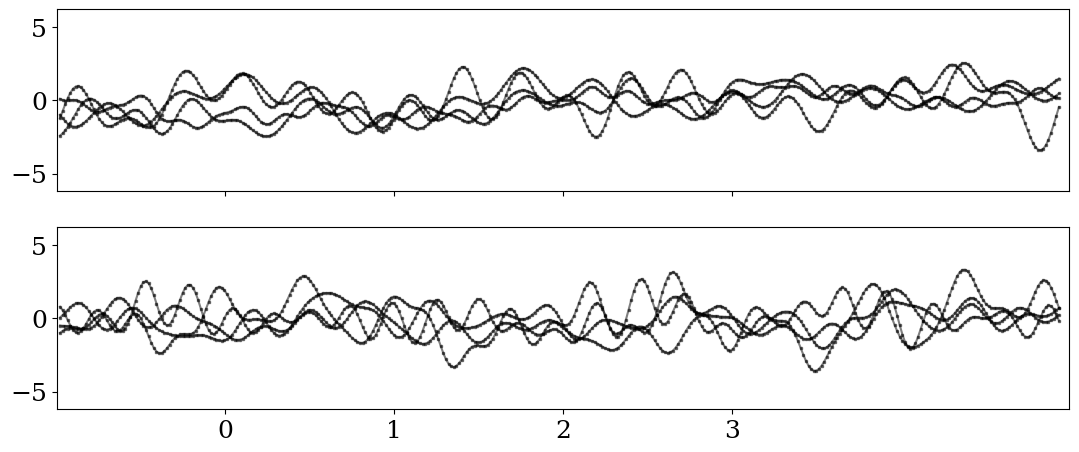

In [47]:

#    plt.ylim(ylim_)
# plt.figure(figsize=figsiz_)
# color_list = ['r','b','g']
# for i in range(nchannels):
#     plt.subplot(3,1,i+1)
#     for j in range(numsamples):
#         plt.plot(xa_samples[0,:,0].cpu().data.numpy(),prior_samples[0,j,:,i].cpu().data.numpy(),'k'+'s-',alpha=0.5,markersize=2)      
#     plt.xlim(xlim_)
#     plt.ylim(ylim_)
# plt.show()


#plt.figure()
#fig, (ax1, ax2) = plt.subplots(figsize=figsiz_,nrows=2, sharex=True, sharey=True)
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True)

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)

#for i in range(nchannels):
for j in range(numsamples):
    ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),prior_samples[0,j,:,0].cpu().data.numpy(),'k'+'s-',alpha=0.5,markersize=2)      
    ax1.set(xlim=xlim_,ylim=ylim_)
    #ax1.set_ylim(ylim_)
    
    
    ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),prior_samples[0,j,:,1].cpu().data.numpy(),'k'+'s-',alpha=0.5,markersize=2)      
    ax2.set(xlim=xlim_,ylim=ylim_)
    
ax1.set(xlim=xlim_,ylim=ylim_)
ax2.set(xlim=xlim_,ylim=ylim_)
ax1.set_xticks(xtick_)
ax2.set_xticks(xtick_)
plt.show()
#plt.savefig('tmp' + fig_pdf, dpi=1000,bbox_inches='tight')









# for i in range(nchannels):
#     plt.subplot(3,1,i+1)
#     for j in range(numsamples):
#         plt.plot(xa_samples[0,:,0].cpu().data.numpy(),prior_samples[0,j,:,i].cpu().data.numpy(),'k'+'s-',alpha=0.5,markersize=2)      
#     plt.xlim(xlim_)
#     plt.ylim(ylim_)
# plt.show()


In [108]:
# #xa_samples.shape
# #prior_samples.shape
# #xa_samples,prior_samples = m_gpsampler.sample_prior_shared(xc,xc,numsamples=numsamples,reorder=False)
# xa_samples,prior_samples = m_gpsampler.sample_prior_shared(xc,xc,numsamples=numsamples,reorder=False)

# prior_samples.shape

In [107]:
# #xa_samples,prior_samples = s_gpsampler.sample_prior_shared(xc,yc,xt,numsamples=numsamples,reorder=False)
# xa_samples,prior_samples = s_gpsampler_ab.sample_prior_shared(xc,yc,xt,numsamples=numsamples,reorder=False)
# xa_samples.shape

## multiouput corrleated sampling

In [109]:
# #prior_samples.size()
# #numsamples=1
# xa_samples,prior_samples = m_gpsampler.sample_prior_shared(xc,xc,numsamples=numsamples,reorder=False)

# # #    plt.ylim(ylim_)
# # plt.figure(figsize=figsiz_)
# # color_list = ['r','b','g']
# # for i in range(nchannels):
# #     plt.subplot(3,1,i+1)
# #     for j in range(numsamples):
# #         plt.plot(xa_samples[0,:,0].cpu().data.numpy(),prior_samples[0,j,:,i].cpu().data.numpy(),'k'+'s-',alpha=0.5,markersize=2)      
# #     plt.xlim(xlim_)
# #     plt.ylim(ylim_)
# # plt.show()


# fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True)

# plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)

# #for i in range(nchannels):
# for j in range(numsamples):
#     ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),prior_samples[0,j,:,0].cpu().data.numpy(),'k'+'s-',alpha=0.5,markersize=2)      
#     ax1.set(xlim=xlim_,ylim=ylim_)
#     #ax1.set_ylim(ylim_)
    
    
#     ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),prior_samples[0,j,:,1].cpu().data.numpy(),'k'+'s-',alpha=0.5,markersize=2)      
#     ax2.set(xlim=xlim_,ylim=ylim_)
    
    
# ax1.set(xlim=xlim_,ylim=ylim_)
# ax2.set(xlim=xlim_,ylim=ylim_)
# ax1.set_xticks(xtick_)
# ax2.set_xticks(xtick_)
# # ax1.legend(loc='lower left',fontsize=fontsiz)
# # ax2.legend(loc='lower left',fontsize=fontsiz)
# plt.show()


# #plt.savefig('tmp2' + fig_pdf, dpi=1000,bbox_inches='tight')


In [ ]:
# import matplotlib.pyplot as plt
# figsiz_=(20,2.5*3)
# #delta=
#ylim_ = [-5-delta,5+delta]

#xlim_ = [0-delta,10+delta]
delta_x = 0.1
delta_y = 0.1
y_=6
xlim_ = [x_lb-delta_x,x_ub+delta_x]
ylim_ = [-y_-delta_y,y_+delta_y]
color_list = ['r','b','g']
xtick_ = list(np.arange(x_ub+1.))
ytick_ = [-(y_-1),0,(y_-1)]

In [112]:
#xa_samples[0]-xgrid[0]

In [113]:
#xa_samples.size(),xgrid.size()

## convcnp + functional features

'./fig_base_nsamples1_initl5.0'

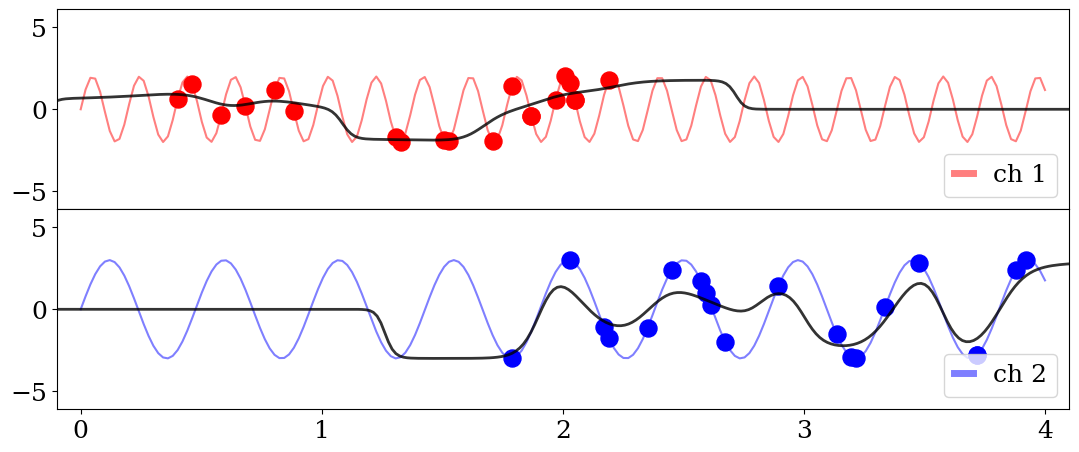

In [114]:

xgrid = convcnp.compute_xgrid(xc.squeeze(),yc,xt.squeeze())
_,nh1,h1,h0 = convcnp.encoder(xc.squeeze(),yc,xgrid.squeeze())


fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True)
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=0.00)
# ax1.plot(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color_list[0]+'o-',markersize=10,label='ch 1')
# ax2.plot(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color_list[1]+'o-',markersize=10,label='ch 2')

ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color=color_list[0],marker='o',s=150)
ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color=color_list[1],marker='o',s=150)
ax1.plot(xf[0,:,0,0].cpu().data.numpy(),yf[0,:,0].cpu().data.numpy(),color_list[0]+'-',markersize=10,label='ch 1',alpha=0.5)
ax2.plot(xf[0,:,0,1].cpu().data.numpy(),yf[0,:,1].cpu().data.numpy(),color_list[1]+'-',markersize=10,label='ch 2',alpha=0.5)

#for j in range(numsamples):
    #ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0].cpu().data.numpy(),'k-'+'s',alpha=0.8,markersize=2)      
    #ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1].cpu().data.numpy(),'k-'+'s',alpha=0.8,markersize=2)      
ax1.plot(xgrid[0,:,0].cpu().data.numpy(),nh1[0,:,0].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      
ax2.plot(xgrid[0,:,1].cpu().data.numpy(),nh1[0,:,1].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      

    
ax1.set(xlim=xlim_,ylim=ylim_)
ax2.set(xlim=xlim_,ylim=ylim_)
ax1.set_xticks(xtick_)
ax2.set_xticks(xtick_)
ax1.set_yticks(ytick_)
ax2.set_yticks(ytick_)

leg_pos = 'lower right'
leg1= ax1.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)
leg2= ax2.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)

for line in leg1.get_lines():
    line.set_linewidth(5) 
    #line.set_markersize(4)
for line in leg2.get_lines():
    line.set_linewidth(5) 
    #line.set_markersize(4)     

    
# plt.xlim(xlim_)
# plt.ylim(ylim_)

savefigname = savepath + 'fig_base_nsamples{}_initl{}'.format(1,init_lscale)
#plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')
savefigname














In [115]:
i_gpsampler.logmu.shape

torch.Size([3, 1])

In [116]:
outs = i_gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)


In [117]:
i_gpsampler.logmu.exp()

tensor([[1.0000e-06],
        [1.4800e-06],
        [1.5458e-06]], grad_fn=<ExpBackward>)

## independent gp and depedent + get posterior

In [118]:


numsamples=3
#xa_samples,posterior_samples,prior_samp10les = gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)
outs = i_gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)
#prior_ind = i_gpsampler.sample_prior_independent(xc,numsamples=numsamples)                
#print(prior_ind.shape)

xa_samples,posterior_samples = outs.xa_samples,outs.posterior_samples
#posterior_samples = posterior_samples/(denrep[:,None,:,:]+1e-6)


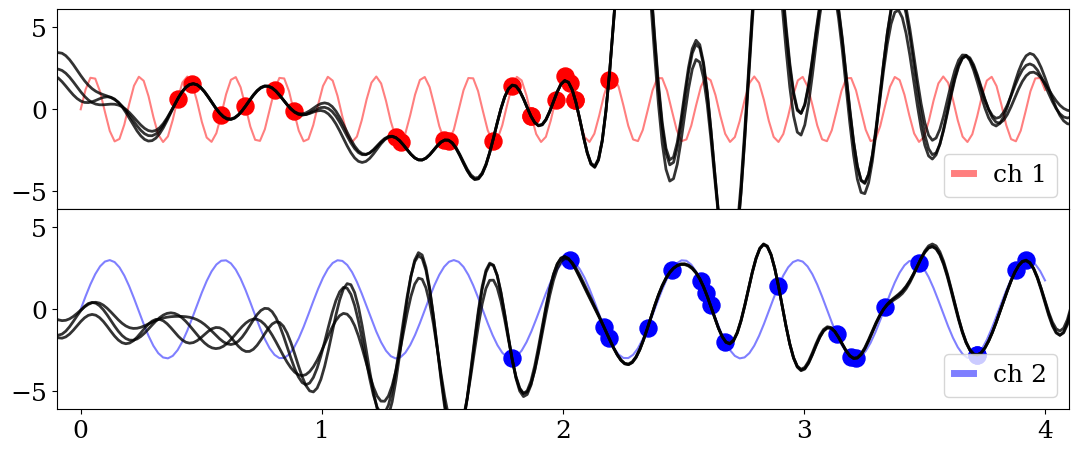



./fig_gpindsampler_nsamples3_initl5.0.pdf





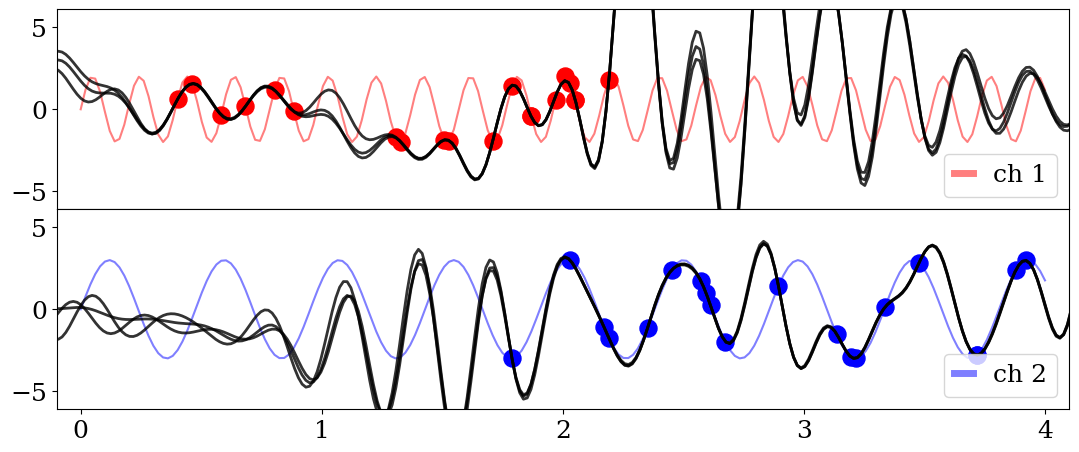

In [121]:





fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True)
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=0.00)
# ax1.plot(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color_list[0]+'o-',markersize=10,label='ch 1')
# ax2.plot(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color_list[1]+'o-',markersize=10,label='ch 2')

ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color=color_list[0],marker='o',s=150)
ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color=color_list[1],marker='o',s=150)
ax1.plot(xf[0,:,0,0].cpu().data.numpy(),yf[0,:,0].cpu().data.numpy(),color_list[0]+'-',markersize=10,label='ch 1',alpha=0.5)
ax2.plot(xf[0,:,0,1].cpu().data.numpy(),yf[0,:,1].cpu().data.numpy(),color_list[1]+'-',markersize=10,label='ch 2',alpha=0.5)

for j in range(numsamples):
    #ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0].cpu().data.numpy(),'k-'+'s',alpha=0.8,markersize=2)      
    #ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1].cpu().data.numpy(),'k-'+'s',alpha=0.8,markersize=2)      
    ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      
    ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      


    #prior yc    
    #ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),prior_yc[0,j,:,0].cpu().data.numpy(),s=50,color='k',marker='o')      
    #ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),prior_yc[0,j,:,1].cpu().data.numpy(),s=50,color='k',marker='o')      
    
        
ax1.set(xlim=xlim_,ylim=ylim_)
ax2.set(xlim=xlim_,ylim=ylim_)
ax1.set_xticks(xtick_)
ax2.set_xticks(xtick_)
ax1.set_yticks(ytick_)
ax2.set_yticks(ytick_)

leg_pos = 'lower right'
leg1= ax1.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)
leg2= ax2.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)

for line in leg1.get_lines():
    line.set_linewidth(5) 
    #line.set_markersize(4)
for line in leg2.get_lines():
    line.set_linewidth(5) 
    #line.set_markersize(4)     

    
# plt.xlim(xlim_)
# plt.ylim(ylim_)

savefigname = savepath + 'fig_gpindsampler_nsamples{}_initl{}'.format(numsamples,init_lscale)
#plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')
plt.show()


print('\n')
print(savefigname + fig_pdf)
#print('regloss: {}'.format(outs.regloss.item()))
print('\n'*2)











# #-------------------------------
# #xa_samples,posterior_samples,_,_  = m_gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)
# outs = m_gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)
# xa_samples,posterior_samples = outs.xa_samples,outs.posterior_samples
# #posterior_samples = posterior_samples/(denrep[:,None,:,:]+1e-6)



# fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True)
# plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=0.00)
# # ax1.plot(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color_list[0]+'o-',markersize=10,label='ch 1')
# # ax2.plot(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color_list[1]+'o-',markersize=10,label='ch 2')

# ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color=color_list[0],marker='o',s=150)
# ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color=color_list[1],marker='o',s=150)
# ax1.plot(xf[0,:,0,0].cpu().data.numpy(),yf[0,:,0].cpu().data.numpy(),color_list[0]+'-',markersize=10,label='ch 1',alpha=0.5)
# ax2.plot(xf[0,:,0,1].cpu().data.numpy(),yf[0,:,1].cpu().data.numpy(),color_list[1]+'-',markersize=10,label='ch 2',alpha=0.5)

# for j in range(numsamples):
#     ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      
#     ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      

#     #prior yc
#     #ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),prior_yc[0,j,:,0].cpu().data.numpy(),s=50,color='k',marker='o')      
#     #ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),prior_yc[0,j,:,1].cpu().data.numpy(),s=50,color='k',marker='o')      
    
    
    
# ax1.set(xlim=xlim_,ylim=ylim_)
# ax2.set(xlim=xlim_,ylim=ylim_)
# ax1.set_xticks(xtick_)
# ax2.set_xticks(xtick_)
# ax1.set_yticks(ytick_)
# ax2.set_yticks(ytick_)

# leg_pos = 'lower right'
# leg1= ax1.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)
# leg2= ax2.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)

# for line in leg1.get_lines():
#     line.set_linewidth(5) 
#     #line.set_markersize(4)
# for line in leg2.get_lines():
#     line.set_linewidth(5) 
#     #line.set_markersize(4)     

    
# # # plt.xlim(xlim_)
# # # plt.ylim(ylim_)
# # savefigname = savepath + 'gpindsampler_nsamples{}'.format(numsamples)
# # plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')
# # savefigname


# savefigname = savepath + 'fig_gpdepsampler_nsamples{}_initl{}'.format(numsamples,init_lscale)
# #plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')
# plt.show()


# print('\n')
# print(savefigname + fig_pdf)
# print('regloss: {}'.format(outs.regloss.item()))












#-------------------------------
#outs = s_gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)
outs = s_gpsampler_ab.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)
xa_samples,posterior_samples = outs.xa_samples,outs.posterior_samples
#posterior_samples = posterior_samples/(denrep[:,None,:,:]+1e-6)



fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True)
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=0.00)
# ax1.plot(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color_list[0]+'o-',markersize=10,label='ch 1')
# ax2.plot(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color_list[1]+'o-',markersize=10,label='ch 2')

ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color=color_list[0],marker='o',s=150)
ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color=color_list[1],marker='o',s=150)
ax1.plot(xf[0,:,0,0].cpu().data.numpy(),yf[0,:,0].cpu().data.numpy(),color_list[0]+'-',markersize=10,label='ch 1',alpha=0.5)
ax2.plot(xf[0,:,0,1].cpu().data.numpy(),yf[0,:,1].cpu().data.numpy(),color_list[1]+'-',markersize=10,label='ch 2',alpha=0.5)

for j in range(numsamples):
    ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      
    ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      

    #prior yc
    #ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),prior_yc[0,j,:,0].cpu().data.numpy(),s=50,color='k',marker='o')      
    #ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),prior_yc[0,j,:,1].cpu().data.numpy(),s=50,color='k',marker='o')      
    
    
    
ax1.set(xlim=xlim_,ylim=ylim_)
ax2.set(xlim=xlim_,ylim=ylim_)
ax1.set_xticks(xtick_)
ax2.set_xticks(xtick_)
ax1.set_yticks(ytick_)
ax2.set_yticks(ytick_)

leg_pos = 'lower right'
leg1= ax1.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)
leg2= ax2.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)

for line in leg1.get_lines():
    line.set_linewidth(5) 
    #line.set_markersize(4)
for line in leg2.get_lines():
    line.set_linewidth(5) 
    #line.set_markersize(4)     

    
# # plt.xlim(xlim_)
# # plt.ylim(ylim_)
# savefigname = savepath + 'gpindsampler_nsamples{}'.format(numsamples)
# plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')
# savefigname


#savefigname = savepath + 'fig_gpdepsampler_nsamples{}_initl{}'.format(numsamples,init_lscale)
#plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')
plt.show()


# print('\n')
# print(savefigname + fig_pdf)
# print('regloss: {}'.format(outs.regloss.item()))





In [122]:
s_gpsampler_ab.logmu.exp(),1/s_gpsampler_ab.logstd.exp()

(tensor([[1.0000e-06],
         [5.3301e-01],
         [9.2684e-01],
         [1.3500e+00],
         [1.8031e+00],
         [2.2377e+00],
         [2.7424e+00],
         [3.1276e+00],
         [3.5697e+00],
         [4.0499e+00]], grad_fn=<ExpBackward>),
 tensor([[0.2000],
         [0.2000],
         [0.2000],
         [0.2000],
         [0.2000],
         [0.2000],
         [0.2000],
         [0.2000],
         [0.2000],
         [0.2000]], grad_fn=<MulBackward0>))

In [77]:


# numsamples=5
# #outs = i_gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)
# outs = m_gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)

# #xa_samples,posterior_samples,density,prior_yc
# posterior_samples = outs.posterior_samples
# datarep = outs.prior_datarep
# denrep = outs.prior_density
# xa_samples = outs.xa_samples


# fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True)
# plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=0.00)
# # ax1.plot(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color_list[0]+'o-',markersize=10,label='ch 1')
# # ax2.plot(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color_list[1]+'o-',markersize=10,label='ch 2')

# ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color=color_list[0],marker='o',s=150)
# ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color=color_list[1],marker='o',s=150)
# ax1.plot(xf[0,:,0,0].cpu().data.numpy(),yf[0,:,0].cpu().data.numpy(),color_list[0]+'-',markersize=10,label='ch 1',alpha=0.5)
# ax2.plot(xf[0,:,0,1].cpu().data.numpy(),yf[0,:,1].cpu().data.numpy(),color_list[1]+'-',markersize=10,label='ch 2',alpha=0.5)

# #ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),datarep[0,:,0].cpu().data.numpy(),'k--',alpha=0.8,linewidth=5)      
# #ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),datarep[0,:,1].cpu().data.numpy(),'k--',alpha=0.8,linewidth=5)      

# # ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),denrep[0,:,0].cpu().data.numpy(),'r--',alpha=0.8,linewidth=2)      
# # ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),denrep[0,:,1].cpu().data.numpy(),'b--',alpha=0.8,linewidth=2)      


# for j in range(numsamples):
#     #ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0].cpu().data.numpy(),'k-'+'s',alpha=0.8,markersize=2)      
#     #ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1].cpu().data.numpy(),'k-'+'s',alpha=0.8,markersize=2)      
#     ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      
#     ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      


#     #prior yc    
#     #ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),prior_yc[0,j,:,0].cpu().data.numpy(),s=50,color='k',marker='o')      
#     #ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),prior_yc[0,j,:,1].cpu().data.numpy(),s=50,color='k',marker='o')      
    
        
# ax1.set(xlim=xlim_,ylim=ylim_)
# ax2.set(xlim=xlim_,ylim=ylim_)
# ax1.set_xticks(xtick_)
# ax2.set_xticks(xtick_)
# ax1.set_yticks(ytick_)
# ax2.set_yticks(ytick_)

# leg_pos = 'lower right'
# leg1= ax1.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)
# leg2= ax2.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)

# for line in leg1.get_lines():
#     line.set_linewidth(5) 
#     #line.set_markersize(4)
# for line in leg2.get_lines():
#     line.set_linewidth(5) 
#     #line.set_markersize(4)     

    
# # plt.xlim(xlim_)
# # plt.ylim(ylim_)

# #savefigname = savepath + 'fig_gpindsampler_nsamples{}_initl{}'.format(numsamples,init_lscale)
# #plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')
# plt.show()


# print('\n')
# #print(savefigname + fig_pdf)
# print('regloss: {}'.format(outs.regloss.item()))
# print('\n'*2)






# numsamples=2
# #xa_samples,posterior_samples,prior_samp10les = gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)
# outs = i_gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)
# #xa_samples,posterior_samples,density,prior_yc
# posterior_samples = outs.posterior_samples
# datarep = outs.prior_datarep
# xa_samples = outs.xa_samples


# fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True)
# plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=0.00)
# # ax1.plot(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color_list[0]+'o-',markersize=10,label='ch 1')
# # ax2.plot(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color_list[1]+'o-',markersize=10,label='ch 2')

# ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),0*yc[0,:,0].cpu().data.numpy(),color=color_list[0],marker='o',s=150)
# ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),0*yc[0,:,1].cpu().data.numpy(),color=color_list[1],marker='o',s=150)
# ax1.plot(xf[0,:,0,0].cpu().data.numpy(),0*yf[0,:,0].cpu().data.numpy(),color_list[0]+'-',markersize=10,label='ch 1',alpha=0.5)
# ax2.plot(xf[0,:,0,1].cpu().data.numpy(),0*yf[0,:,1].cpu().data.numpy(),color_list[1]+'-',markersize=10,label='ch 2',alpha=0.5)

# ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),denrep[0,:,0].cpu().data.numpy(),'k--',alpha=0.8,linewidth=5)      
# ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),denrep[0,:,1].cpu().data.numpy(),'k--',alpha=0.8,linewidth=5)      

        
# ax1.set(xlim=xlim_,ylim=ylim_)
# ax2.set(xlim=xlim_,ylim=ylim_)
# ax1.set_xticks(xtick_)
# ax2.set_xticks(xtick_)
# ax1.set_yticks(ytick_)
# ax2.set_yticks(ytick_)

# leg_pos = 'lower right'
# leg1= ax1.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)
# leg2= ax2.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)

# for line in leg1.get_lines():
#     line.set_linewidth(5) 
#     #line.set_markersize(4)
# for line in leg2.get_lines():
#     line.set_linewidth(5) 
#     #line.set_markersize(4)     

    
# # plt.xlim(xlim_)
# # plt.ylim(ylim_)

# savefigname = savepath + 'fig_gpindsampler_nsamples{}_initl{}'.format(numsamples,init_lscale)
# #plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')
# plt.show()


# print('\n')
# #print(savefigname + fig_pdf)
# #print('regloss: {}'.format(outs.regloss.item()))
# print('\n'*2)




In [39]:
#m_gpsampler.prior_scale.shape

In [40]:

# denrep = outs.prior_density


# fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True)
# plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=0.00)
# # ax1.plot(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color_list[0]+'o-',markersize=10,label='ch 1')
# # ax2.plot(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color_list[1]+'o-',markersize=10,label='ch 2')

# ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),0*yc[0,:,0].cpu().data.numpy(),color=color_list[0],marker='o',s=150)
# ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),0*yc[0,:,1].cpu().data.numpy(),color=color_list[1],marker='o',s=150)
# ax1.plot(xf[0,:,0,0].cpu().data.numpy(),0*yf[0,:,0].cpu().data.numpy(),color_list[0]+'-',markersize=10,label='ch 1',alpha=0.5)
# ax2.plot(xf[0,:,0,1].cpu().data.numpy(),0*yf[0,:,1].cpu().data.numpy(),color_list[1]+'-',markersize=10,label='ch 2',alpha=0.5)

# ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),1.-2*(torch.sigmoid(denrep/0.5)-.5)[0,:,0].cpu().data.numpy(),'k--',alpha=0.8,linewidth=5)      
# ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),1.-2*(torch.sigmoid(denrep/0.5)-.5)[0,:,1].cpu().data.numpy(),'k--',alpha=0.8,linewidth=5)      
# # ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),2*(torch.sigmoid(denrep/0.5)-.5)[0,:,0].cpu().data.numpy(),'k--',alpha=0.8,linewidth=5)      
# # ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),2*(torch.sigmoid(denrep/0.5)-.5)[0,:,1].cpu().data.numpy(),'k--',alpha=0.8,linewidth=5)      

        
# ax1.set(xlim=xlim_,ylim=[0,1])
# ax2.set(xlim=xlim_,ylim=[0,1])
# ax1.set_xticks(xtick_)
# ax2.set_xticks(xtick_)
# # ax1.set_yticks(ytick_)
# # ax2.set_yticks(ytick_)

# leg_pos = 'lower right'
# leg1= ax1.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)
# leg2= ax2.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)

# for line in leg1.get_lines():
#     line.set_linewidth(5) 
#     #line.set_markersize(4)
# for line in leg2.get_lines():
#     line.set_linewidth(5) 
#     #line.set_markersize(4)     

    
# # plt.xlim(xlim_)
# # plt.ylim(ylim_)

# savefigname = savepath + 'fig_gpindsampler_nsamples{}_initl{}'.format(numsamples,init_lscale)
# #plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')
# plt.show()


# print('\n')
# #print(savefigname + fig_pdf)
# #print('regloss: {}'.format(outs.regloss.item()))
# print('\n'*2)

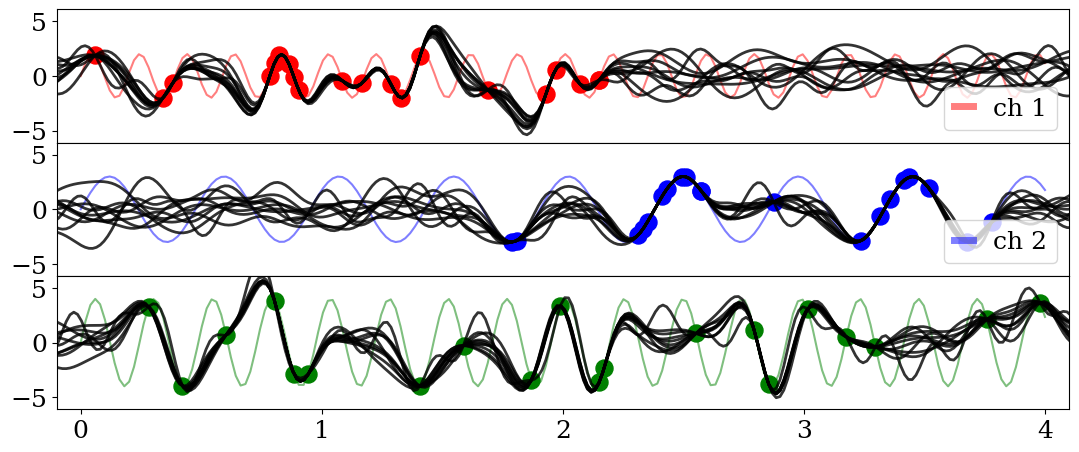



./fig_gpindsampler_nsamples10_initl0.5.pdf





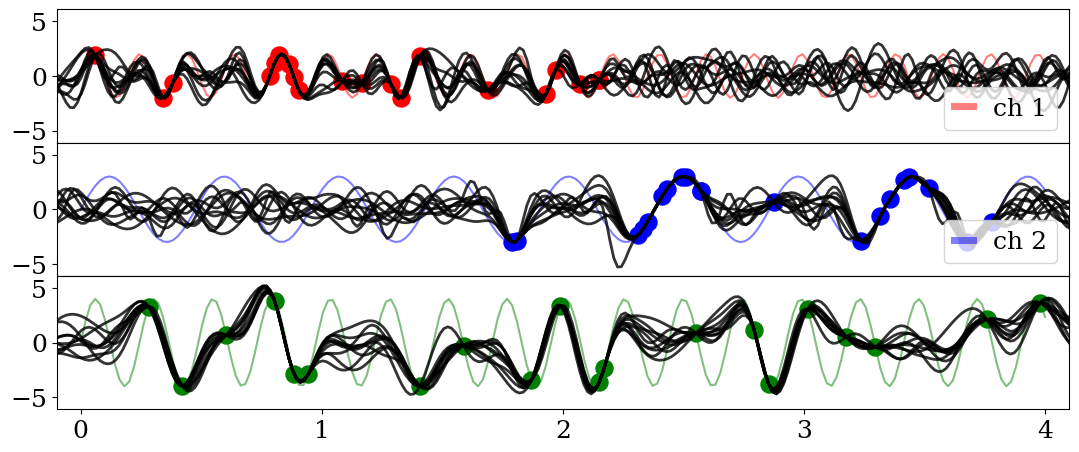



./fig_gpdepsampler_nsamples10_initl0.5.pdf


In [46]:
numsamples=10
#xa_samples,posterior_samples,prior_samp10les = gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)
outs = i_gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)
xa_samples,posterior_samples = outs.xa_samples,outs.posterior_samples
#posterior_samples = posterior_samples/(denrep[:,None,:,:]+1e-6)


#fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True, sharey=True)

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=0.00)
# ax1.plot(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color_list[0]+'o-',markersize=10,label='ch 1')
# ax2.plot(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color_list[1]+'o-',markersize=10,label='ch 2')

ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color=color_list[0],marker='o',s=150)
ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color=color_list[1],marker='o',s=150)
ax3.scatter(xc[0,:,0,2].cpu().data.numpy(),yc[0,:,2].cpu().data.numpy(),color=color_list[2],marker='o',s=150)

ax1.plot(xf[0,:,0,0].cpu().data.numpy(),yf[0,:,0].cpu().data.numpy(),color_list[0]+'-',markersize=10,label='ch 1',alpha=0.5)
ax2.plot(xf[0,:,0,1].cpu().data.numpy(),yf[0,:,1].cpu().data.numpy(),color_list[1]+'-',markersize=10,label='ch 2',alpha=0.5)
ax3.plot(xf[0,:,0,2].cpu().data.numpy(),yf[0,:,2].cpu().data.numpy(),color_list[2]+'-',markersize=10,label='ch 3',alpha=0.5)

for j in range(numsamples):
    #ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0].cpu().data.numpy(),'k-'+'s',alpha=0.8,markersize=2)      
    #ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1].cpu().data.numpy(),'k-'+'s',alpha=0.8,markersize=2)      
    ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      
    ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      
    ax3.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,2].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      


    #prior yc    
    #ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),prior_yc[0,j,:,0].cpu().data.numpy(),s=50,color='k',marker='o')      
    #ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),prior_yc[0,j,:,1].cpu().data.numpy(),s=50,color='k',marker='o')      
    
        
ax1.set(xlim=xlim_,ylim=ylim_)
ax2.set(xlim=xlim_,ylim=ylim_)
ax1.set_xticks(xtick_)
ax2.set_xticks(xtick_)
ax1.set_yticks(ytick_)
ax2.set_yticks(ytick_)

leg_pos = 'lower right'
leg1= ax1.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)
leg2= ax2.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)

for line in leg1.get_lines():
    line.set_linewidth(5) 
    #line.set_markersize(4)
for line in leg2.get_lines():
    line.set_linewidth(5) 
    #line.set_markersize(4)     

    
# plt.xlim(xlim_)
# plt.ylim(ylim_)

savefigname = savepath + 'fig_gpindsampler_nsamples{}_initl{}'.format(numsamples,init_lscale)
#plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')
plt.show()


print('\n')
print(savefigname + fig_pdf)
#print('regloss: {}'.format(outs.regloss.item()))
print('\n'*2)











# #-------------------------------
# #xa_samples,posterior_samples,_,_  = m_gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)
# outs = m_gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)
# xa_samples,posterior_samples = outs.xa_samples,outs.posterior_samples
# #posterior_samples = posterior_samples/(denrep[:,None,:,:]+1e-6)



# fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True, sharey=True)
# plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=0.00)
# # ax1.plot(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color_list[0]+'o-',markersize=10,label='ch 1')
# # ax2.plot(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color_list[1]+'o-',markersize=10,label='ch 2')

# ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color=color_list[0],marker='o',s=150)
# ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color=color_list[1],marker='o',s=150)
# ax3.scatter(xc[0,:,0,2].cpu().data.numpy(),yc[0,:,2].cpu().data.numpy(),color=color_list[2],marker='o',s=150)

# ax1.plot(xf[0,:,0,0].cpu().data.numpy(),yf[0,:,0].cpu().data.numpy(),color_list[0]+'-',markersize=10,label='ch 1',alpha=0.5)
# ax2.plot(xf[0,:,0,1].cpu().data.numpy(),yf[0,:,1].cpu().data.numpy(),color_list[1]+'-',markersize=10,label='ch 2',alpha=0.5)
# ax3.plot(xf[0,:,0,2].cpu().data.numpy(),yf[0,:,2].cpu().data.numpy(),color_list[2]+'-',markersize=10,label='ch 3',alpha=0.5)

# for j in range(numsamples):
#     ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      
#     ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      
#     ax3.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,2].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      

#     #prior yc
#     #ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),prior_yc[0,j,:,0].cpu().data.numpy(),s=50,color='k',marker='o')      
#     #ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),prior_yc[0,j,:,1].cpu().data.numpy(),s=50,color='k',marker='o')      
    
    
    
# ax1.set(xlim=xlim_,ylim=ylim_)
# ax2.set(xlim=xlim_,ylim=ylim_)
# ax1.set_xticks(xtick_)
# ax2.set_xticks(xtick_)
# ax1.set_yticks(ytick_)
# ax2.set_yticks(ytick_)

# leg_pos = 'lower right'
# leg1= ax1.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)
# leg2= ax2.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)

# for line in leg1.get_lines():
#     line.set_linewidth(5) 
#     #line.set_markersize(4)
# for line in leg2.get_lines():
#     line.set_linewidth(5) 
#     #line.set_markersize(4)     

    
# # # plt.xlim(xlim_)
# # # plt.ylim(ylim_)
# # savefigname = savepath + 'gpindsampler_nsamples{}'.format(numsamples)
# # plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')
# # savefigname


# savefigname = savepath + 'fig_gpdepsampler_nsamples{}_initl{}'.format(numsamples,init_lscale)
# #plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')
# plt.show()


# print('\n')
# print(savefigname + fig_pdf)
# #print('regloss: {}'.format(outs.regloss.item()))






#-------------------------------
#xa_samples,posterior_samples,_,_  = m_gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)
#outs = s_gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)
outs = s_gpsampler_ab.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)

xa_samples,posterior_samples = outs.xa_samples,outs.posterior_samples
#posterior_samples = posterior_samples/(denrep[:,None,:,:]+1e-6)



fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True, sharey=True)
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=0.00)
# ax1.plot(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color_list[0]+'o-',markersize=10,label='ch 1')
# ax2.plot(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color_list[1]+'o-',markersize=10,label='ch 2')

ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color=color_list[0],marker='o',s=150)
ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color=color_list[1],marker='o',s=150)
ax3.scatter(xc[0,:,0,2].cpu().data.numpy(),yc[0,:,2].cpu().data.numpy(),color=color_list[2],marker='o',s=150)

ax1.plot(xf[0,:,0,0].cpu().data.numpy(),yf[0,:,0].cpu().data.numpy(),color_list[0]+'-',markersize=10,label='ch 1',alpha=0.5)
ax2.plot(xf[0,:,0,1].cpu().data.numpy(),yf[0,:,1].cpu().data.numpy(),color_list[1]+'-',markersize=10,label='ch 2',alpha=0.5)
ax3.plot(xf[0,:,0,2].cpu().data.numpy(),yf[0,:,2].cpu().data.numpy(),color_list[2]+'-',markersize=10,label='ch 3',alpha=0.5)

for j in range(numsamples):
    ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      
    ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      
    ax3.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,2].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      

    #prior yc
    #ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),prior_yc[0,j,:,0].cpu().data.numpy(),s=50,color='k',marker='o')      
    #ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),prior_yc[0,j,:,1].cpu().data.numpy(),s=50,color='k',marker='o')      
    
    
    
ax1.set(xlim=xlim_,ylim=ylim_)
ax2.set(xlim=xlim_,ylim=ylim_)
ax1.set_xticks(xtick_)
ax2.set_xticks(xtick_)
ax1.set_yticks(ytick_)
ax2.set_yticks(ytick_)

leg_pos = 'lower right'
leg1= ax1.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)
leg2= ax2.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)

for line in leg1.get_lines():
    line.set_linewidth(5) 
    #line.set_markersize(4)
for line in leg2.get_lines():
    line.set_linewidth(5) 
    #line.set_markersize(4)     

    
# # plt.xlim(xlim_)
# # plt.ylim(ylim_)
# savefigname = savepath + 'gpindsampler_nsamples{}'.format(numsamples)
# plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')
# savefigname


savefigname = savepath + 'fig_gpdepsampler_nsamples{}_initl{}'.format(numsamples,init_lscale)
#plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')
plt.show()


print('\n')
print(savefigname + fig_pdf)
#print('regloss: {}'.format(outs.regloss.item()))





In [42]:
#s_gpsampler.logits

In [43]:
#s_gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)
#s_gpsampler.sample_prior_independent(xt,yt,numsamples=10,newsample=True)


In [ ]:
#axs
numsamples = 3
#xa_samples,posterior_samples,density,prior_yc = mcat_gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)
#xa_samples,prior_samples,update_term,density,prior_yc = mcat_gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)


In [ ]:
posterior_samples0 = prior_samples + update_term.sum(dim=-1)
posterior_samples = prior_samples[:,:,:,None,:] + update_term 

In [78]:
prior_samples.

SyntaxError: invalid syntax (<ipython-input-78-6ec8e21039aa>, line 1)

In [79]:

#posterior_samples.shape
#posterior_samples[0,j,:,1,1] - posterior_samples0[0,j,:,1]

In [93]:
# #-------------------------------

# # nb,numsamples,ndata2,_ = posterior_samples.shape
# # posterior_samples = posterior_samples.reshape(nb,numsamples,ndata2,num_channels,-1)



# figsiz=(16,4)

# #fig, (ax11, ax12, ax21, ax22) = plt.subplots(nrows=2,ncols=2, sharex=True, sharey=True)
# fig, (axs) = plt.subplots(nrows=2,ncols=3,figsize=figsiz, sharex=True, sharey=True)
# plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=0.00,wspace=0.0)
# # ax1.plot(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color_list[0]+'o-',markersize=10,label='ch 1')
# # ax2.plot(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color_list[1]+'o-',markersize=10,label='ch 2')

# axs[0,0].scatter(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color=color_list[0],marker='o',s=150)
# axs[0,0].plot(xf[0,:,0,0].cpu().data.numpy(),yf[0,:,0].cpu().data.numpy(),color_list[0]+'-',markersize=10,label='ch 1',alpha=0.5)

# axs[0,2].scatter(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color=color_list[0],marker='o',s=150)
# axs[0,2].plot(xf[0,:,0,0].cpu().data.numpy(),yf[0,:,0].cpu().data.numpy(),color_list[0]+'-',markersize=10,label='ch 1',alpha=0.5)

# axs[1,1].scatter(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color=color_list[1],marker='o',s=150)
# axs[1,1].plot(xf[0,:,0,1].cpu().data.numpy(),yf[0,:,1].cpu().data.numpy(),color_list[1]+'-',markersize=10,label='ch 2',alpha=0.5)

# axs[1,2].scatter(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color=color_list[1],marker='o',s=150)
# axs[1,2].plot(xf[0,:,0,1].cpu().data.numpy(),yf[0,:,1].cpu().data.numpy(),color_list[1]+'-',markersize=10,label='ch 2',alpha=0.5)


# for j in range(numsamples):
#     axs[0,0].plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0,0].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      
#     axs[0,1].plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0,1].cpu().data.numpy(),'k-',alpha=0.5,linewidth=2)      
#     axs[0,2].plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples0[0,j,:,0].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      
    
    
#     axs[1,0].plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1,0].cpu().data.numpy(),'k-',alpha=0.5,linewidth=2)      
#     axs[1,1].plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1,1].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      
#     axs[1,2].plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples0[0,j,:,1].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      

    
# #     ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,3].cpu().data.numpy(),'k--',alpha=0.5,linewidth=2)      
# #     ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,4].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      
    
# #     #prior yc
# #     #ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),prior_yc[0,j,:,0].cpu().data.numpy(),s=50,color='k',marker='o')      
# #     #ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),prior_yc[0,j,:,1].cpu().data.numpy(),s=50,color='k',marker='o')      
    
    
    
# axs[0,0].set(xlim=xlim_,ylim=ylim_)
# axs[0,0].set_xticks(xtick_)
# axs[0,0].set_yticks(ytick_)

# # ax2.set(xlim=xlim_,ylim=ylim_)
# # ax1.set_xticks(xtick_)
# # ax2.set_xticks(xtick_)
# # ax1.set_yticks(ytick_)
# # ax2.set_yticks(ytick_)

# # leg_pos = 'lower right'
# # leg1= ax1.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)
# # leg2= ax2.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)

# for line in leg1.get_lines():
#     line.set_linewidth(5) 
#     #line.set_markersize(4)
# for line in leg2.get_lines():
#     line.set_linewidth(5) 
#     #line.set_markersize(4)     

    
# # # plt.xlim(xlim_)
# # # plt.ylim(ylim_)
# # savefigname = savepath + 'gpindsampler_nsamples{}'.format(numsamples)
# # plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')
# # savefigname


# savefigname = savepath + 'fig_gpdepsampler_nsamples{}_initl{}'.format(numsamples,init_lscale)
# #plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')
# plt.show()


# print('\n')
# print(savefigname + fig_pdf)
# print('regloss: {}'.format(m_gpsampler.regloss.item()))








In [81]:
xc.shape,xt.shape

(torch.Size([3, 20, 1, 3]), torch.Size([3, 40, 1, 3]))

In [82]:
#xc.shape
xct = torch.cat([xc,xt],dim=1)
xct.shape

torch.Size([3, 60, 1, 3])

In [83]:






# fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True)
# plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=0.00)
# # ax1.plot(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color_list[0]+'o-',markersize=10,label='ch 1')
# # ax2.plot(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color_list[1]+'o-',markersize=10,label='ch 2')

# ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color=color_list[0],marker='o',s=150)
# ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color=color_list[1],marker='o',s=150)
# ax1.plot(xf[0,:,0,0].cpu().data.numpy(),yf[0,:,0].cpu().data.numpy(),color_list[0]+'-',markersize=10,label='ch 1',alpha=0.5)
# ax2.plot(xf[0,:,0,1].cpu().data.numpy(),yf[0,:,1].cpu().data.numpy(),color_list[1]+'-',markersize=10,label='ch 2',alpha=0.5)

# for j in range(numsamples):
#     ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      
#     ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1].cpu().data.numpy(),'k--',alpha=0.5,linewidth=2)      

    
#     ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,3].cpu().data.numpy(),'k--',alpha=0.5,linewidth=2)      
#     ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,4].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      
    
#     #prior yc
#     #ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),prior_yc[0,j,:,0].cpu().data.numpy(),s=50,color='k',marker='o')      
#     #ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),prior_yc[0,j,:,1].cpu().data.numpy(),s=50,color='k',marker='o')      
    
    
    
# ax1.set(xlim=xlim_,ylim=ylim_)
# ax2.set(xlim=xlim_,ylim=ylim_)
# ax1.set_xticks(xtick_)
# ax2.set_xticks(xtick_)
# ax1.set_yticks(ytick_)
# ax2.set_yticks(ytick_)

# leg_pos = 'lower right'
# leg1= ax1.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)
# leg2= ax2.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)

# for line in leg1.get_lines():
#     line.set_linewidth(5) 
#     #line.set_markersize(4)
# for line in leg2.get_lines():
#     line.set_linewidth(5) 
#     #line.set_markersize(4)     

    
# # # plt.xlim(xlim_)
# # # plt.ylim(ylim_)
# # savefigname = savepath + 'gpindsampler_nsamples{}'.format(numsamples)
# # plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')
# # savefigname


# savefigname = savepath + 'fig_gpdepsampler_nsamples{}_initl{}'.format(numsamples,init_lscale)
# #plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')
# plt.show()


# print('\n')
# print(savefigname + fig_pdf)
# print('regloss: {}'.format(m_gpsampler.regloss.item()))








In [84]:
# #i_gpsampler.kernel.prepare_cross_params()
# i_gpsampler.kernel.prepare_cross_params()
#m_gpsampler.kernel.prepare_cross_params()

In [85]:
m_gpsampler.kernel.prepare_cross_params()

(tensor([[0.2450, 0.5720, 0.5767, 0.5720, 0.8990, 0.9037, 0.5767, 0.9037, 0.9083]],
        grad_fn=<ViewBackward>),
 tensor([[2.0000, 1.0000, 1.0000, 1.0000, 2.0000, 1.0000, 1.0000, 1.0000, 2.0000]],
        grad_fn=<MulBackward0>),
 tensor([[1.0000, 0.3221, 0.3202, 0.3221, 1.0000, 0.3989, 0.3202, 0.3989, 1.0000]],
        grad_fn=<ClampBackward1>))

In [86]:
i_gpsampler.kernel.prepare_cross_params()

(tensor([[0.2450, 0.5720, 0.5767, 0.5720, 0.8990, 0.9037, 0.5767, 0.9037, 0.9083]],
        grad_fn=<ViewBackward>),
 tensor([[2.0000, 1.0000, 1.0000, 1.0000, 2.0000, 1.0000, 1.0000, 1.0000, 2.0000]],
        grad_fn=<MulBackward0>),
 tensor([[1.0000, 0.3221, 0.3202, 0.3221, 1.0000, 0.3989, 0.3202, 0.3989, 1.0000]],
        grad_fn=<ClampBackward1>))

In [87]:
m_gpsampler.kernel.logweight.exp()

AttributeError: 'SM_kernel' object has no attribute 'logweight'

In [88]:
#m_gpsampler.kernel.logweight.exp()

In [89]:
#numsamples=3
#xa_samples,posterior_samples,prior_samples = gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)
xa_samples,posterior_samples,density,prior_yc = i_gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)


fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True, sharey=True)
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=0.00)
# ax1.plot(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color_list[0]+'o-',markersize=10,label='ch 1')
# ax2.plot(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color_list[1]+'o-',markersize=10,label='ch 2')

ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color=color_list[0],marker='o',s=150)
ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color=color_list[1],marker='o',s=150)
ax3.scatter(xc[0,:,0,2].cpu().data.numpy(),yc[0,:,2].cpu().data.numpy(),color=color_list[2],marker='o',s=150)

ax1.plot(xf[0,:,0,0].cpu().data.numpy(),yf[0,:,0].cpu().data.numpy(),color_list[0]+'-',markersize=10,label='ch 1',alpha=0.5)
ax2.plot(xf[0,:,0,1].cpu().data.numpy(),yf[0,:,1].cpu().data.numpy(),color_list[1]+'-',markersize=10,label='ch 2',alpha=0.5)
ax3.plot(xf[0,:,0,2].cpu().data.numpy(),yf[0,:,2].cpu().data.numpy(),color_list[2]+'-',markersize=10,label='ch 3',alpha=0.5)

for j in range(numsamples):
    ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      
    ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      
    ax3.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,2].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      

    #prior yc
    #ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),prior_yc[0,j,:,0].cpu().data.numpy(),s=50,color='k',marker='o')      
    #ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),prior_yc[0,j,:,1].cpu().data.numpy(),s=50,color='k',marker='o')      
    
    
    
ax1.set(xlim=xlim_,ylim=ylim_)
ax2.set(xlim=xlim_,ylim=ylim_)
ax1.set_xticks(xtick_)
ax2.set_xticks(xtick_)
ax1.set_yticks(ytick_)
ax2.set_yticks(ytick_)

leg_pos = 'lower right'
leg1= ax1.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)
leg2= ax2.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)
leg3= ax3.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)

for line in leg1.get_lines():
    line.set_linewidth(5) 
    #line.set_markersize(4)
for line in leg2.get_lines():
    line.set_linewidth(5) 
    #line.set_markersize(4)     
for line in leg3.get_lines():
    line.set_linewidth(5) 

savefigname = savepath + 'fig_gpdepsampler_nsamples{}_initl{}'.format(numsamples,init_lscale)
#plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')

savefigname + fig_pdf
plt.show()










#numsamples=3
#xa_samples,posterior_samples,prior_samples = gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)
xa_samples,posterior_samples,density,prior_yc = m_gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)


fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True, sharey=True)
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=0.00)
# ax1.plot(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color_list[0]+'o-',markersize=10,label='ch 1')
# ax2.plot(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color_list[1]+'o-',markersize=10,label='ch 2')

ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color=color_list[0],marker='o',s=150)
ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color=color_list[1],marker='o',s=150)
ax3.scatter(xc[0,:,0,2].cpu().data.numpy(),yc[0,:,2].cpu().data.numpy(),color=color_list[2],marker='o',s=150)

ax1.plot(xf[0,:,0,0].cpu().data.numpy(),yf[0,:,0].cpu().data.numpy(),color_list[0]+'-',markersize=10,label='ch 1',alpha=0.5)
ax2.plot(xf[0,:,0,1].cpu().data.numpy(),yf[0,:,1].cpu().data.numpy(),color_list[1]+'-',markersize=10,label='ch 2',alpha=0.5)
ax3.plot(xf[0,:,0,2].cpu().data.numpy(),yf[0,:,2].cpu().data.numpy(),color_list[2]+'-',markersize=10,label='ch 3',alpha=0.5)

for j in range(numsamples):
    ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      
    ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      
    ax3.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,2].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      

    #prior yc
    #ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),prior_yc[0,j,:,0].cpu().data.numpy(),s=50,color='k',marker='o')      
    #ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),prior_yc[0,j,:,1].cpu().data.numpy(),s=50,color='k',marker='o')      
    
    
    
ax1.set(xlim=xlim_,ylim=ylim_)
ax2.set(xlim=xlim_,ylim=ylim_)
ax1.set_xticks(xtick_)
ax2.set_xticks(xtick_)
ax1.set_yticks(ytick_)
ax2.set_yticks(ytick_)

leg_pos = 'lower right'
leg1= ax1.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)
leg2= ax2.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)
leg3= ax3.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)

for line in leg1.get_lines():
    line.set_linewidth(5) 
    #line.set_markersize(4)
for line in leg2.get_lines():
    line.set_linewidth(5) 
    #line.set_markersize(4)     
for line in leg3.get_lines():
    line.set_linewidth(5) 

savefigname = savepath + 'fig_gpdepsampler_nsamples{}_initl{}'.format(numsamples,init_lscale)
#plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')

savefigname + fig_pdf
plt.show()




ValueError: too many values to unpack (expected 4)

In [90]:
#prior_yc[0,j,:,0].shape,xc.shape

## independent gp and depedent + get posterior proxi

In [91]:

# numsamples=4

# #numsamples=3
# #xa_samples,posterior_samples,prior_samples = gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)
# xa_samples,posterior_samples,density,prior_yc  = iproxi_gpsampler.sample_posterior(xc,yc,xc,numsamples=numsamples,reorder=False)
# #xa_samples,posterior_samples,density = mproxi_gpsampler.sample_posterior_proxi(xc,yc,xc,numsamples=numsamples,reorder=False)



# fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True)
# plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=0.00)
# # ax1.plot(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color_list[0]+'o-',markersize=10,label='ch 1')
# # ax2.plot(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color_list[1]+'o-',markersize=10,label='ch 2')

# ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color=color_list[0],marker='o',s=150)
# ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color=color_list[1],marker='o',s=150)
# ax1.plot(xf[0,:,0,0].cpu().data.numpy(),yf[0,:,0].cpu().data.numpy(),color_list[0]+'-',markersize=10,label='ch 1',alpha=0.5)
# ax2.plot(xf[0,:,0,1].cpu().data.numpy(),yf[0,:,1].cpu().data.numpy(),color_list[1]+'-',markersize=10,label='ch 2',alpha=0.5)

# for j in range(numsamples):
#     #ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0].cpu().data.numpy(),'k-'+'s',alpha=0.8,markersize=2)      
#     #ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1].cpu().data.numpy(),'k-'+'s',alpha=0.8,markersize=2)      
#     ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      
#     ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      

    
# ax1.set(xlim=xlim_,ylim=ylim_)
# ax2.set(xlim=xlim_,ylim=ylim_)
# ax1.set_xticks(xtick_)
# ax2.set_xticks(xtick_)
# ax1.set_yticks(ytick_)
# ax2.set_yticks(ytick_)

# leg_pos = 'lower right'
# leg1= ax1.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)
# leg2= ax2.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)

# for line in leg1.get_lines():
#     line.set_linewidth(5) 
#     #line.set_markersize(4)
# for line in leg2.get_lines():
#     line.set_linewidth(5) 
#     #line.set_markersize(4)     

    
# # # plt.xlim(xlim_)
# # # plt.ylim(ylim_)
# # savefigname = savepath + 'gpindsampler_nsamples{}'.format(numsamples)
# # plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')
# # savefigname


# savefigname = savepath + 'fig_gpindsamplerproxi_nsamples{}_initl{}'.format(numsamples,init_lscale)
# #plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')
# plt.show()


# print('\n')
# print(savefigname + fig_pdf)
# print('regloss: {}'.format(iproxi_gpsampler.regloss.item()))














# #numsamples=3
# #xa_samples,posterior_samples,prior_samples = gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)
# xa_samples,posterior_samples,density,prior_yc  = mproxi_gpsampler.sample_posterior(xc,yc,xc,numsamples=numsamples,reorder=False)
# #xa_samples,posterior_samples,density = mproxi_gpsampler.sample_posterior_proxi(xc,yc,xc,numsamples=numsamples,reorder=False)
# fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True)
# plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=0.00)
# # ax1.plot(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color_list[0]+'o-',markersize=10,label='ch 1')
# # ax2.plot(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color_list[1]+'o-',markersize=10,label='ch 2')

# ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color=color_list[0],marker='o',s=150)
# ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color=color_list[1],marker='o',s=150)
# ax1.plot(xf[0,:,0,0].cpu().data.numpy(),yf[0,:,0].cpu().data.numpy(),color_list[0]+'-',markersize=10,label='ch 1',alpha=0.5)
# ax2.plot(xf[0,:,0,1].cpu().data.numpy(),yf[0,:,1].cpu().data.numpy(),color_list[1]+'-',markersize=10,label='ch 2',alpha=0.5)

# for j in range(numsamples):
#     #ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0].cpu().data.numpy(),'k-'+'s',alpha=0.8,markersize=2)      
#     #ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1].cpu().data.numpy(),'k-'+'s',alpha=0.8,markersize=2)      
#     ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      
#     ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      

    
# ax1.set(xlim=xlim_,ylim=ylim_)
# ax2.set(xlim=xlim_,ylim=ylim_)
# ax1.set_xticks(xtick_)
# ax2.set_xticks(xtick_)
# ax1.set_yticks(ytick_)
# ax2.set_yticks(ytick_)

# leg_pos = 'lower right'
# leg1= ax1.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)
# leg2= ax2.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)

# for line in leg1.get_lines():
#     line.set_linewidth(5) 
#     #line.set_markersize(4)
# for line in leg2.get_lines():
#     line.set_linewidth(5) 
#     #line.set_markersize(4)     

    
# # # plt.xlim(xlim_)
# # # plt.ylim(ylim_)
# # savefigname = savepath + 'gpindsampler_nsamples{}'.format(numsamples)
# # plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')
# # savefigname


# savefigname = savepath + 'fig_gpdepsamplerproxi_nsamples{}_initl{}'.format(numsamples,init_lscale)
# #plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')

# plt.show()


# print('\n')
# print(savefigname + fig_pdf)
# print('regloss: {}'.format(mproxi_gpsampler.regloss.item()))










In [92]:
#mproxi_gpsampler.kernel.logweight.exp()

In [67]:
# #numsamples=3
# #xa_samples,posterior_samples,prior_samples = gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)
# xa_samples,posterior_samples,density,prior_yc  = mproxi_gpsampler.sample_posterior(xc,yc,xc,numsamples=numsamples,reorder=False)
# #xa_samples,posterior_samples,density = mproxi_gpsampler.sample_posterior_proxi(xc,yc,xc,numsamples=numsamples,reorder=False)



# # #figsiz_=(20,2*3)
# # plt.figure(figsize=figsiz_)
# # color_list = ['r','b','g']
# # for i in range(nchannels):
# #     plt.subplot(3,1,i+1)
# #     plt.plot(xc[0,:,0,i].cpu().data.numpy(),yc[0,:,i].cpu().data.numpy(),color_list[i]+'o-',markersize=10)
# #     #plt.plot(xt[0,:,0,i].cpu().data.numpy(),yt[0,:,i].cpu().data.numpy(),color_list[i]+'s',markersize=10)
    
# #     #plt.plot(xct_samples[0,:,0].cpu().data.numpy(),(prior_samples)[0,:,i].cpu().data.numpy(),'k'+'d',alpha=0.2)        
# #     #plt.plot(xct_samples[0,:,0].cpu().data.numpy(),(prior_samples+update_term)[0,:,i].cpu().data.numpy(),'k'+'s',alpha=0.8)    
    
# #     #plt.plot(xct_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,:,i].cpu().data.numpy(),'k'+'s',alpha=0.5)    
# #     #plt.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,0,:,i].cpu().data.numpy(),'k'+'s',alpha=0.8,markersize=5)
# #     for j in range(numsamples):
# #         #plt.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,0,:,i].cpu().data.numpy(),'k-'+'s',alpha=0.8,markersize=5)
# #         plt.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,i].cpu().data.numpy(),'k-'+'s',alpha=0.8,markersize=2)   
# #     plt.xlim(xlim_)
# #     plt.ylim(ylim_)
    
# #     plt.yticks(ylim_)    
# #     #plt.xticks(np.arange(20)*0.5)
# # plt.show()





# fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True)
# plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=0.00)
# # ax1.plot(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color_list[0]+'o-',markersize=10,label='ch 1')
# # ax2.plot(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color_list[1]+'o-',markersize=10,label='ch 2')

# ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color=color_list[0],marker='o',s=150)
# ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color=color_list[1],marker='o',s=150)
# ax1.plot(xf[0,:,0,0].cpu().data.numpy(),yf[0,:,0].cpu().data.numpy(),color_list[0]+'-',markersize=10,label='ch 1',alpha=0.5)
# ax2.plot(xf[0,:,0,1].cpu().data.numpy(),yf[0,:,1].cpu().data.numpy(),color_list[1]+'-',markersize=10,label='ch 2',alpha=0.5)

# for j in range(numsamples):
#     #ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0].cpu().data.numpy(),'k-'+'s',alpha=0.8,markersize=2)      
#     #ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1].cpu().data.numpy(),'k-'+'s',alpha=0.8,markersize=2)      
#     ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      
#     ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      

    
# ax1.set(xlim=xlim_,ylim=ylim_)
# ax2.set(xlim=xlim_,ylim=ylim_)
# ax1.set_xticks(xtick_)
# ax2.set_xticks(xtick_)
# ax1.set_yticks(ytick_)
# ax2.set_yticks(ytick_)

# leg_pos = 'lower right'
# leg1= ax1.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)
# leg2= ax2.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)

# for line in leg1.get_lines():
#     line.set_linewidth(5) 
#     #line.set_markersize(4)
# for line in leg2.get_lines():
#     line.set_linewidth(5) 
#     #line.set_markersize(4)     

    
# # # plt.xlim(xlim_)
# # # plt.ylim(ylim_)
# # savefigname = savepath + 'gpindsampler_nsamples{}'.format(numsamples)
# # plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')
# # savefigname


# savefigname = savepath + 'fig_gpdepsamplerproxi_nsamples{}_initl{}'.format(numsamples,init_lscale)
# #plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')

# plt.show()


# print('\n')
# print(savefigname + fig_pdf)
# print('regloss: {}'.format(mproxi_gpsampler.regloss.item()))





In [68]:
# #numsamples=3
# #xa_samples,posterior_samples,prior_samples = gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)
# xa_samples,posterior_samples,density,prior_yc = mproxi_gpsampler.sample_posterior(xc,yc,xc,numsamples=numsamples,reorder=False)



# # #figsiz_=(20,2*3)
# # plt.figure(figsize=figsiz_)
# # color_list = ['r','b','g']
# # for i in range(nchannels):
# #     plt.subplot(3,1,i+1)
# #     plt.plot(xc[0,:,0,i].cpu().data.numpy(),yc[0,:,i].cpu().data.numpy(),color_list[i]+'o-',markersize=10)
# #     #plt.plot(xt[0,:,0,i].cpu().data.numpy(),yt[0,:,i].cpu().data.numpy(),color_list[i]+'s',markersize=10)
    
# #     #plt.plot(xct_samples[0,:,0].cpu().data.numpy(),(prior_samples)[0,:,i].cpu().data.numpy(),'k'+'d',alpha=0.2)        
# #     #plt.plot(xct_samples[0,:,0].cpu().data.numpy(),(prior_samples+update_term)[0,:,i].cpu().data.numpy(),'k'+'s',alpha=0.8)    
    
# #     #plt.plot(xct_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,:,i].cpu().data.numpy(),'k'+'s',alpha=0.5)    
# #     #plt.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,0,:,i].cpu().data.numpy(),'k'+'s',alpha=0.8,markersize=5)
# #     for j in range(numsamples):
# #         #plt.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,0,:,i].cpu().data.numpy(),'k-'+'s',alpha=0.8,markersize=5)
# #         plt.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,i].cpu().data.numpy(),'k-'+'s',alpha=0.8,markersize=2)   
# #     plt.xlim(xlim_)
# #     plt.ylim(ylim_)
    
# #     plt.yticks(ylim_)    
# #     #plt.xticks(np.arange(20)*0.5)
# # plt.show()





# fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True, sharey=True)
# plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=0.00)
# # ax1.plot(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color_list[0]+'o-',markersize=10,label='ch 1')
# # ax2.plot(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color_list[1]+'o-',markersize=10,label='ch 2')

# ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color=color_list[0],marker='o',s=150)
# ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color=color_list[1],marker='o',s=150)
# ax3.scatter(xc[0,:,0,2].cpu().data.numpy(),yc[0,:,2].cpu().data.numpy(),color=color_list[2],marker='o',s=150)

# ax1.plot(xf[0,:,0,0].cpu().data.numpy(),yf[0,:,0].cpu().data.numpy(),color_list[0]+'-',markersize=10,label='ch 1',alpha=0.5)
# ax2.plot(xf[0,:,0,1].cpu().data.numpy(),yf[0,:,1].cpu().data.numpy(),color_list[1]+'-',markersize=10,label='ch 2',alpha=0.5)
# ax3.plot(xf[0,:,0,2].cpu().data.numpy(),yf[0,:,2].cpu().data.numpy(),color_list[2]+'-',markersize=10,label='ch 3',alpha=0.5)

# for j in range(numsamples):
#     ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      
#     ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      
#     ax3.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,2].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      

#     #prior yc
#     #ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),prior_yc[0,j,:,0].cpu().data.numpy(),s=50,color='k',marker='o')      
#     #ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),prior_yc[0,j,:,1].cpu().data.numpy(),s=50,color='k',marker='o')      
    
    
    
# ax1.set(xlim=xlim_,ylim=ylim_)
# ax2.set(xlim=xlim_,ylim=ylim_)
# ax1.set_xticks(xtick_)
# ax2.set_xticks(xtick_)
# ax1.set_yticks(ytick_)
# ax2.set_yticks(ytick_)

# leg_pos = 'lower right'
# leg1= ax1.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)
# leg2= ax2.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)
# leg3= ax3.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)

# for line in leg1.get_lines():
#     line.set_linewidth(5) 
#     #line.set_markersize(4)
# for line in leg2.get_lines():
#     line.set_linewidth(5) 
#     #line.set_markersize(4)     
# for line in leg3.get_lines():
#     line.set_linewidth(5) 

    
# # # plt.xlim(xlim_)
# # # plt.ylim(ylim_)
# # savefigname = savepath + 'gpindsampler_nsamples{}'.format(numsamples)
# # plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')
# # savefigname


# savefigname = savepath + 'fig_gpdepsampler_nsamples{}_initl{}'.format(numsamples,init_lscale)
# #plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')

# savefigname + fig_pdf



